In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('BankMarketing/BankMarketingDataSet.csv', sep=';')
df.head()

,id,age,job,marital,education,default,housing,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,30,blue-collar,married,basic.9y,no,yes,no,-1.8,92.893,-46.2,1.313,5099.1,no
1,2,39,services,single,high.school,no,no,no,1.1,93.994,-36.4,4.855,5191.0,no
2,3,25,services,married,high.school,no,yes,no,1.4,94.465,-41.8,4.962,5228.1,no
3,4,38,services,married,basic.9y,no,unknown,unknown,1.4,94.465,-41.8,4.959,5228.1,no
4,5,47,admin.,married,university.degree,no,yes,no,-0.1,93.200,-42.0,4.191,5195.8,no


In [115]:
print("Number of instances: ", len(df))
print("Any missing values: ", df.isnull().values.any())
print("The dataset is balanced: ", df['y'].value_counts())

Number of instances:  4119
Any missing values:  False
The dataset is balanced:  no     3668
yes     451
Name: y, dtype: int64


<AxesSubplot:>

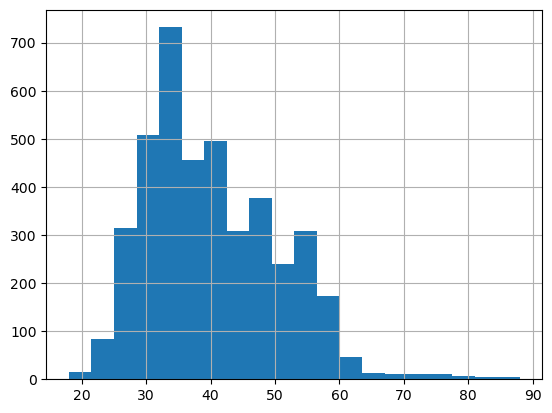

In [116]:
#Show the age distribution
df['age'].hist(bins=20)


y           no  yes
marital            
divorced   403   43
married   2257  252
single     998  155
unknown     10    1


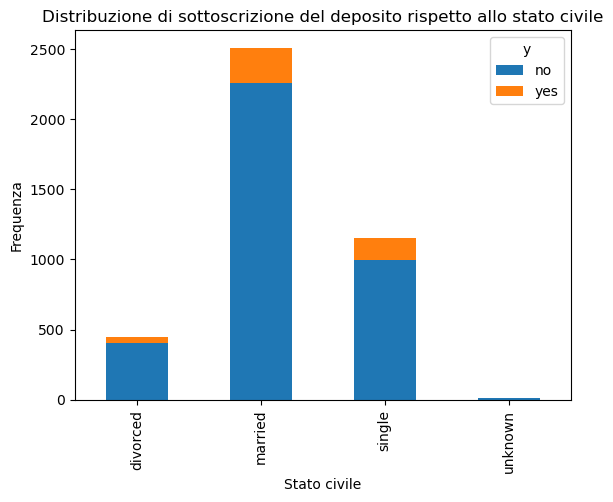

In [117]:
# Creazione di una tabella pivot per contare la frequenza di sottoscrizione del deposito per ciascuno stato civile
pivot_table = df.pivot_table(index='marital', columns='y', aggfunc='size', fill_value=0)

# Visualizza la tabella pivot
print(pivot_table)

# Crea un grafico a barre per mostrare la distribuzione di sottoscrizione del deposito rispetto allo stato civile
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Stato civile')
plt.ylabel('Frequenza')
plt.title('Distribuzione di sottoscrizione del deposito rispetto allo stato civile')
plt.show()


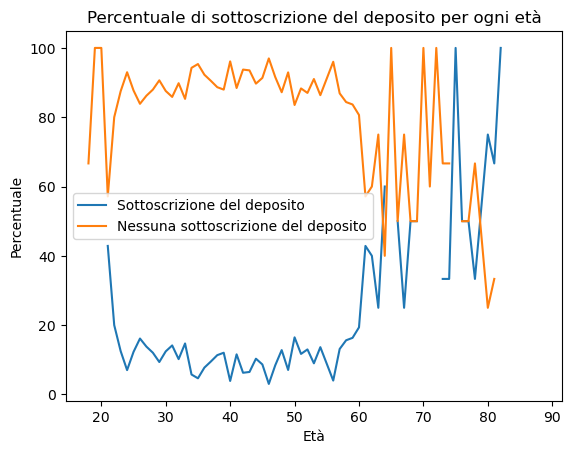

In [118]:
#Calcolare una serie che rappresenti per ogni età la percentuale delle persone che hanno sottoscritto un deposito. Calcolare poi una serie che rappresenti per ogni età la percentuale delle persone che non hanno sottoscritto un deposito. Rappresentare graficamente le due serie 
#Calcolo la percentuale di persone che hanno sottoscritto un deposito per ogni età
age_deposit = df[df['y'] == 'yes']['age'].value_counts()
age_deposit = age_deposit.sort_index()
age_deposit = age_deposit / df['age'].value_counts() * 100

#Calcolo la percentuale di persone che non hanno sottoscritto un deposito per ogni età
age_no_deposit = df[df['y'] == 'no']['age'].value_counts()
age_no_deposit = age_no_deposit.sort_index()
age_no_deposit = age_no_deposit / df['age'].value_counts() * 100

#Visualizzo i risultati
plt.plot(age_deposit.index, age_deposit.values, label='Sottoscrizione del deposito')
plt.plot(age_no_deposit.index, age_no_deposit.values, label='Nessuna sottoscrizione del deposito')
plt.xlabel('Età')
plt.ylabel('Percentuale')
plt.title('Percentuale di sottoscrizione del deposito per ogni età')
plt.legend()
plt.show()


In [119]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

istanze_unknown = df[df.eq('unknown').any(axis=1)]
istanze_unknown=istanze_unknown.index
df=df.drop(istanze_unknown)

categorical_data = df.select_dtypes(include=['object']).copy()
numerical_data = df.select_dtypes(include=['number']).copy()
# Codifica le variabili categoriche
le = LabelEncoder()
for col in categorical_data.columns:
    categorical_data[col] = le.fit_transform(categorical_data[col])

# Unisci le variabili categoriche e numeriche
process_df = pd.concat([categorical_data, numerical_data], axis=1)

data_labels = process_df['y']
process_df = process_df.drop('y', axis=1)

# Dividi il dataset in training set e test set
X_train, X_test, y_train, y_test = train_test_split(process_df, data_labels, test_size=1/3, random_state=42)

In [120]:
categorical_data.head()

,job,marital,education,default,housing,loan,y
0,1,1,2,0,1,0,0
1,7,2,3,0,0,0,0
2,7,1,3,0,1,0,0
4,0,1,6,0,1,0,0
5,7,2,6,0,0,0,0


In [121]:
process_df.head()

,job,marital,education,default,housing,loan,id,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,1,2,0,1,0,1,30,-1.8,92.893,-46.2,1.313,5099.1
1,7,2,3,0,0,0,2,39,1.1,93.994,-36.4,4.855,5191.0
2,7,1,3,0,1,0,3,25,1.4,94.465,-41.8,4.962,5228.1
4,0,1,6,0,1,0,5,47,-0.1,93.200,-42.0,4.191,5195.8
5,7,2,6,0,0,0,6,32,-1.1,94.199,-37.5,0.884,4963.6


Accuracy train:  1.0
Accuracy test:  0.8135922330097087


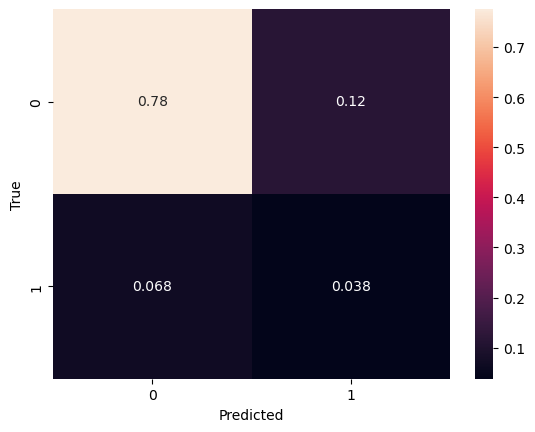

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Crea un classificatore Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

# Effettua una predizione sul test set
y_pred = tree.predict(X_test)

# Calcola l'accuratezza
accuracy_train = accuracy_score(y_train, tree.predict(X_train))
print("Accuracy train: ", accuracy_train) 
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test: ", accuracy_test)

#Show the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
sns.heatmap(cm, annot=True)
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()


In [123]:
from sklearn.svm import SVC

# Crea un classificatore SVM
svm = SVC()
svm.fit(X_train, y_train)

# Effettua una predizione sul test set
y_pred = svm.predict(X_test)

# Calcola l'accuratezza
accuracy_train = accuracy_score(y_train, svm.predict(X_train))
print("Accuracy train: ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test: ", accuracy_test)

Accuracy train:  0.8733009708737864
Accuracy test:  0.8941747572815534


In [124]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(tree, process_df, data_labels, cv=10)
scores_svm = cross_val_score(svm, process_df, data_labels, cv=10)

print("Accuracy Decision Tree: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))
print("Accuracy SVM: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

Accuracy Decision Tree: 0.78 (+/- 0.22)
Accuracy SVM: 0.88 (+/- 0.00)


In [125]:
numeric = numerical_data
numeric

X_train, X_test, y_train, y_test = train_test_split(numeric, data_labels, test_size=1/3, random_state=42)

#svm
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_train = accuracy_score(y_train, svm.predict(X_train))
print("Accuracy train: ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test: ", accuracy_test)

#tree
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_train = accuracy_score(y_train, tree.predict(X_train))
print("Accuracy train: ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test: ", accuracy_test)


Accuracy train:  0.8733009708737864
Accuracy test:  0.8941747572815534
Accuracy train:  1.0
Accuracy test:  0.8310679611650486


In [129]:

categorical = df.select_dtypes(include=['object']).copy()
categorical = categorical.drop('y', axis=1)

hot = pd.get_dummies(categorical)

new_df= pd.concat([hot, numerical_data], axis=1)
new_df.head()

X_train, X_test, y_train, y_test = train_test_split(new_df, data_labels, test_size=1/3)

#svm
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy_train = accuracy_score(y_train, svm.predict(X_train))
print("Accuracy train: SVM ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test: SVM ", accuracy_test)

#tree
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_train = accuracy_score(y_train, tree.predict(X_train))
print("Accuracy train: tree ", accuracy_train)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy test: tree ", accuracy_test)


Accuracy train: SVM  0.8771844660194175
Accuracy test: SVM  0.8864077669902912
Accuracy train: tree  1.0
Accuracy test: tree  0.8233009708737864


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(process_df, data_labels, test_size=1/3, random_state=42)
# Crea un modello di regressione lineare
lr = LinearRegression()

# Addestra il modello sul training set
lr.fit(X_train, y_train)

# Effettua una predizione sul test set
y_pred = lr.predict(X_test).round()

print("Accuracy train: ", lr.score(X_train, y_train))
print("Accuracy test: ", lr.score(X_test, y_test))
# Calcola l'errore quadratico medio
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)


Accuracy train:  0.14258676924582736
Accuracy test:  0.15516419625843336
MSE:  0.10582524271844661
